# <center>Joining Dataframe tasks</center>

In [1]:
import pandas as pd

## Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [6]:
transaction = pd.concat([pd.read_csv("transactions_2014.csv"),pd.read_csv("transactions_2015.csv")]).drop(["Unnamed: 0"],axis=1)

In [7]:
transaction.head()

,Date,Store_Number,Transaction_count,Target_pct,Met_target,bonus_payable,month,day_of_week
0,2014-01-01,25,840,0.3360,False,0,1,2
1,2014-01-01,36,487,0.1948,False,0,1,2
2,2014-01-02,1,1875,0.7500,False,0,1,3
3,2014-01-02,2,2122,0.8488,False,0,1,3
4,2014-01-02,3,3350,1.3400,True,100,1,3


In [10]:
transaction.tail()

,Date,Store_Number,Transaction_count,Target_pct,Met_target,bonus_payable,month,day_of_week
18341,2015-12-31,49,3828,1.5312,True,100,12,3
18342,2015-12-31,50,2948,1.1792,True,100,12,3
18343,2015-12-31,51,2892,1.1568,True,100,12,3
18344,2015-12-31,53,2300,0.9200,False,0,12,3
18345,2015-12-31,54,1572,0.6288,False,0,12,3


## Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”.

In [12]:
retail = pd.read_csv("retail_2016_2017.csv")
store = pd.read_csv("stores.csv")

In [13]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [15]:
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [16]:
retail_stores = retail.merge(store,
                             how ="inner",
                             left_on = "store_nbr",
                             right_on ="store_nbr")

In [18]:
retail_stores.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [19]:
retail_stores.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054944 entries, 0 to 1054943
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1054944 non-null  int64  
 1   date         1054944 non-null  object 
 2   store_nbr    1054944 non-null  int64  
 3   family       1054944 non-null  object 
 4   sales        1054944 non-null  float64
 5   onpromotion  1054944 non-null  int64  
 6   city         1054944 non-null  object 
 7   state        1054944 non-null  object 
 8   type         1054944 non-null  object 
 9   cluster      1054944 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 372.8 MB


<Axes: xlabel='city'>

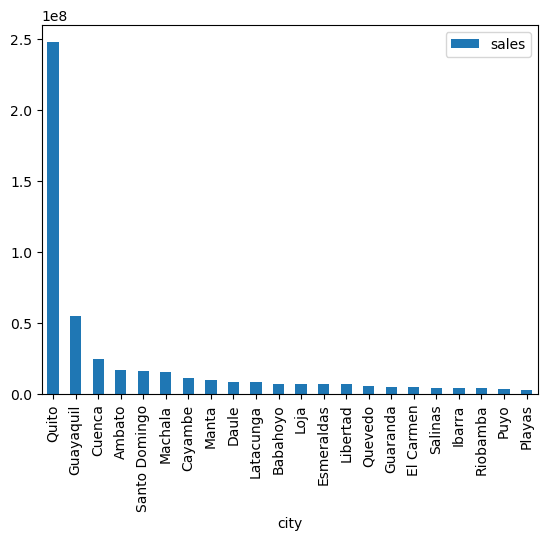

In [22]:
(retail_stores.groupby(["city"]).
 agg({"sales":"sum"})
 .sort_values(by="sales",ascending=False).round().plot.bar())

<Axes: xlabel='date'>

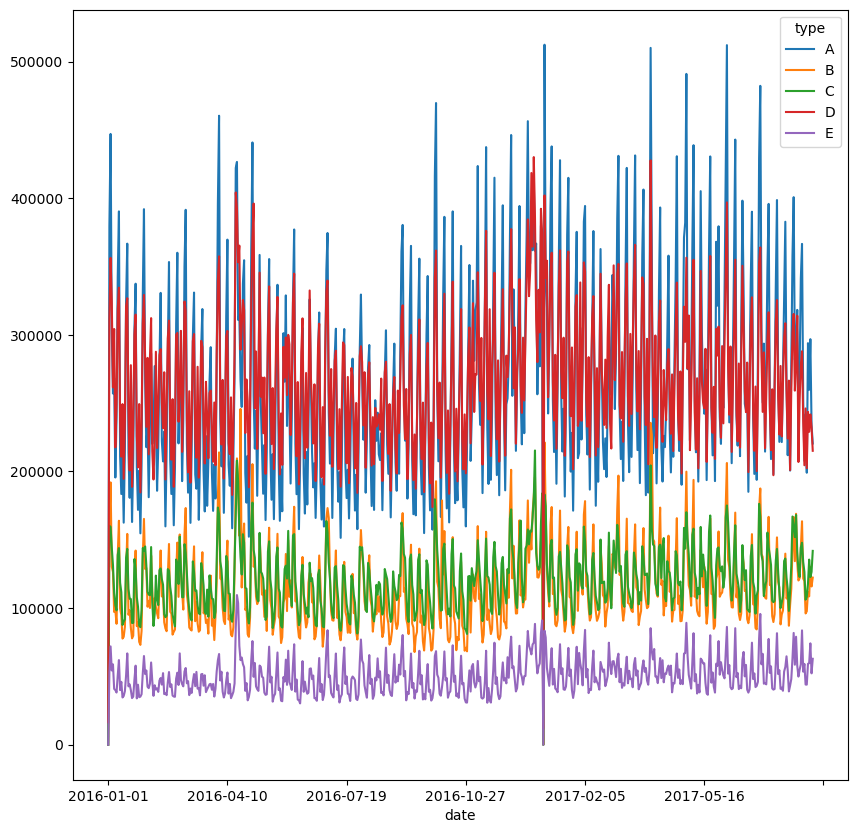

In [27]:
# Create pivot table with date in index and type as column, cells are sum sales for type/day
# then create a line plot with increased figure size

(retail_stores.pivot_table(
    index=["date"],columns="type",values="sales",aggfunc="sum").
plot(figsize=(10,10)))

In [31]:
retail_stores["date"] =pd.to_datetime(retail_stores["date"])

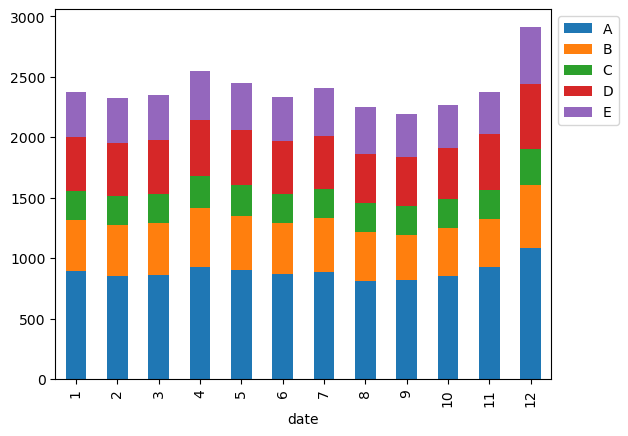

In [34]:
# Create pivot table with type in index and month as column, cells are sum sales for type/day
# Note: You may have chosen row as month and type as column, that's fine too!

retail_stores.pivot_table(index="type",
                          columns =retail_stores["date"].dt.month,
                         values="sales",
        aggfunc="mean").T.plot.bar(stacked=True).legend(bbox_to_anchor=(1,1))